Phase 1: Data Collection and Exploratory Data Analysis (EDA)**bold text**

In [3]:

from google.colab import files
uploaded = files.upload()



Saving Food_Delivery_Time_Prediction.csv to Food_Delivery_Time_Prediction.csv


Step 1 - Data Import and Preprocessing

In [4]:
# Importing necessary libraries
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced visualizations
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling

# Loading the dataset
# Assuming the dataset is uploaded to Google Colab and available as 'Food_Delivery_Time_Prediction.csv'
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')

# Displaying the first few rows of the dataset to understand its structure
df.head()


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


HANDLING MISSING VALUES

In [5]:
# Checking for missing values
df.isnull().sum()

# Handling missing values:
# If missing values are minimal, we drop them; otherwise, we can impute them.
# Example: Dropping rows with missing values
df = df.dropna()

# Verifying that missing values have been handled
df.isnull().sum()


,0
Order_ID,0
Customer_Location,0
Restaurant_Location,0
Distance,0
Weather_Conditions,0
Traffic_Conditions,0
Delivery_Person_Experience,0
Order_Priority,0
Order_Time,0
Vehicle_Type,0


DATA TRANSFORMATION

In [6]:
# Encoding Categorical Variables
# Using Label Encoding for simplicity
label_encoders = {}
categorical_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Saving the encoder for possible inverse transformation

# Normalizing/Standardizing numeric columns
scaler = StandardScaler()

# List of numeric columns to scale
numeric_cols = ['Distance', 'Delivery_Time', 'Order_Cost']

# Scaling the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Displaying first few rows after transformation
df.head()


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,1,2,4,Medium,Afternoon,2,4.1,3.0,-1.487932,0.501852,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,0,2,8,Low,Night,2,4.5,4.2,-0.264987,-1.634294,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,2,2,9,High,Night,1,3.3,3.4,-0.741529,1.092646,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,0,1,2,Medium,Evening,1,3.2,3.7,1.382411,-0.923323,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,1,0,6,Low,Night,1,3.5,2.8,-1.280915,-0.779755,2.34


Step 2 - Exploratory Data Analysis (EDA)

Descriptive Statistics

In [7]:
# Generating descriptive statistics
df.describe()


,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000
mean,-1.643130e-16,1.560000,1.085000,5.250000,0.965000,3.738500,3.686500,3.730349e-16,-2.042810e-16,46.616650
std,1.002509e+00,1.096546,0.768589,2.745027,0.810593,0.703021,0.697063,1.002509e+00,1.002509e+00,29.361706
min,-1.608593e+00,0.000000,0.000000,1.000000,0.000000,2.500000,2.600000,-1.857269e+00,-1.688954e+00,1.240000
25%,-7.924313e-01,1.000000,0.000000,3.000000,0.000000,3.200000,3.100000,-7.896704e-01,-9.013569e-01,21.602500
50%,-1.806765e-01,2.000000,1.000000,5.000000,1.000000,3.800000,3.700000,7.662482e-02,-1.925947e-02,47.530000
75%,7.325599e-01,3.000000,2.000000,8.000000,2.000000,4.300000,4.300000,8.789834e-01,9.076026e-01,70.245000
max,1.963762e+00,3.000000,2.000000,10.000000,2.000000,5.000000,5.000000,1.652608e+00,1.737826e+00,99.740000


Correlation Analysis

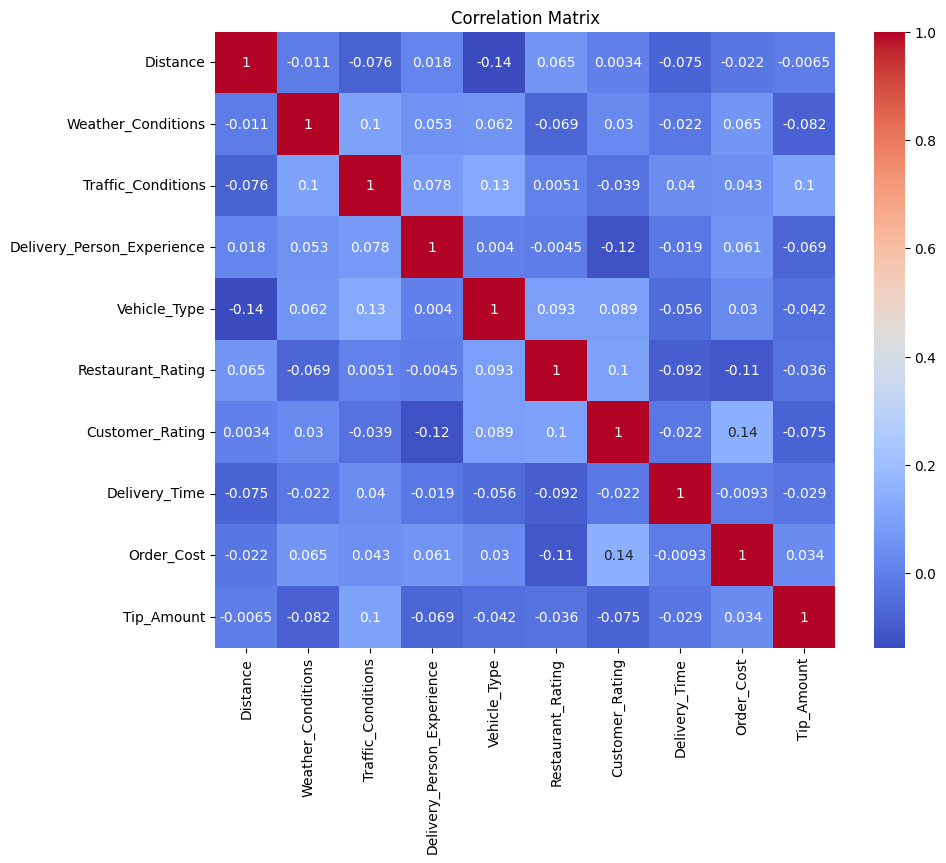

In [9]:
# Computing correlation matrix
# Selecting only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Outlier Detection

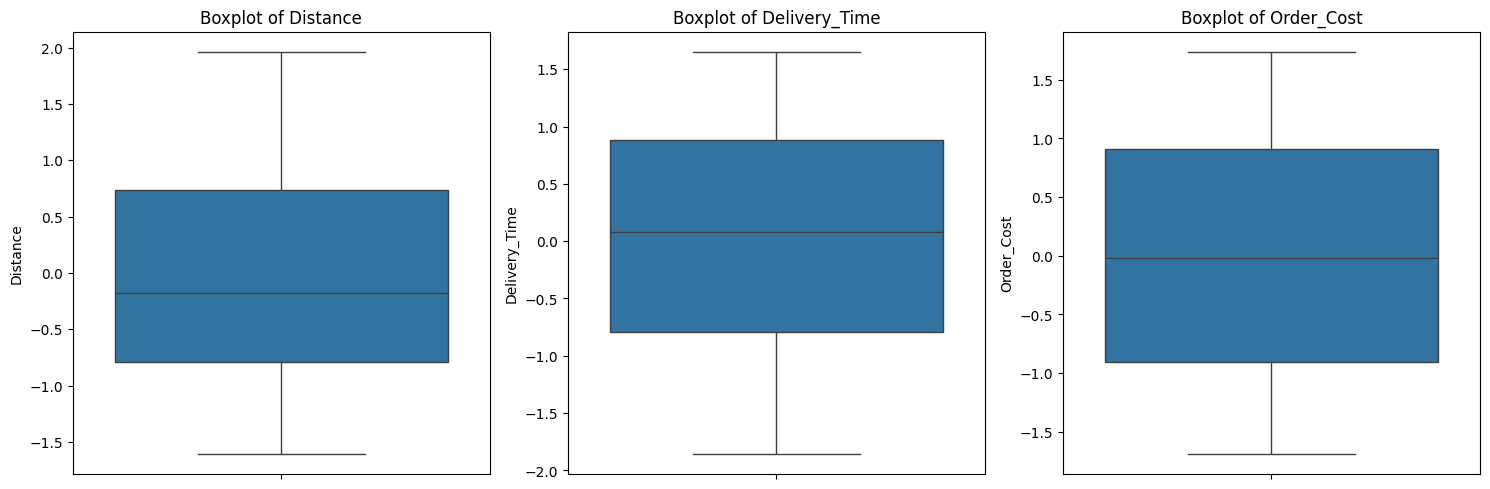

In [10]:
# Visualizing outliers using boxplots
plt.figure(figsize=(15,5))
for idx, col in enumerate(numeric_cols):
    plt.subplot(1, 3, idx+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Handling outliers (Optional: Removing extreme outliers)
# Example: Removing points beyond 1.5*IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]


Step 3 - Feature Engineering

Distance Calculation (If not available)

In [11]:
# If 'Distance' column does not exist, calculate using Haversine Formula
# Example columns: Restaurant_Latitude, Restaurant_Longitude, Customer_Latitude, Customer_Longitude

from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    # Converting degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula to calculate distance
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# If 'Distance' is not present, create it
# Uncomment and run if needed
# df['Distance'] = df.apply(lambda row: haversine(row['Restaurant_Latitude'], row['Restaurant_Longitude'],
#                                                 row['Customer_Latitude'], row['Customer_Longitude']), axis=1)


Time-Based Features

In [15]:
# Creating new feature 'Rush_Hour' based on 'Order_Time'

# Example function to create Rush Hour feature
def rush_hour(time_str):
    # Assuming 'Order_Time' has format like "Morning", "Afternoon", "Evening", etc.
    parts = time_str.split()  # Split the string into parts
    if len(parts) > 1:  # Check if there are at least two parts (time and hour)
        try:
            hour = int(parts[1].replace(':', ''))  # Extract hour and convert to integer
            if "Morning" in time_str:
                return 1 if 7 <= hour <= 9 else 0  # Check for rush hour in the morning
            elif "Afternoon" in time_str or "Evening" in time_str:
                return 1 if 17 <= hour <= 20 else 0  # Check for rush hour in the afternoon/evening
            else:
                return 0  # Handle other cases
        except ValueError:
            return 0  # Handle cases where hour extraction fails (e.g., non-numeric hour)
    else:
        return 0  # Handle cases with only one part (e.g., "Morning")

**Phase 2: Predictive Modeling**

Step 4 - Linear Regression Model

Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Defining features (X) and target (y)
X = df[['Distance', 'Traffic_Conditions', 'Order_Cost', 'Rush_Hour']]  # example features
y = df['Delivery_Time']

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building

In [20]:
# Initializing Linear Regression model
linear_model = LinearRegression()

# Fitting the model
linear_model.fit(X_train, y_train)

# Predicting on test data
y_pred = linear_model.predict(X_test)


Evaluation Metrics

In [21]:
# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 1.0510255275035285
R-squared (R²): -0.006172438022527649
Mean Absolute Error (MAE): 0.8542874558132809


Step 5 - Logistic Regression Model (for Categorization)


Model Objective

In [22]:
# Creating a binary target: 'Fast' if Delivery_Time <= median else 'Delayed'
median_time = df['Delivery_Time'].median()
df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 1 if x <= median_time else 0)


Model Implementation

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Features for classification
X_class = df[['Distance', 'Traffic_Conditions', 'Order_Cost', 'Rush_Hour']]
y_class = df['Delivery_Status']

# Splitting the dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Initializing Logistic Regression model
logistic_model = LogisticRegression()

# Fitting the model
logistic_model.fit(X_train_class, y_train_class)

# Predicting on test data
y_pred_class = logistic_model.predict(X_test_class)


**Phase 3: Reporting and Insights**

Step 6 - Model Evaluation and Comparison

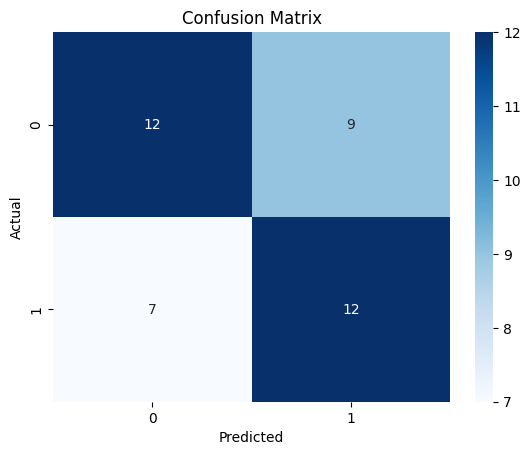

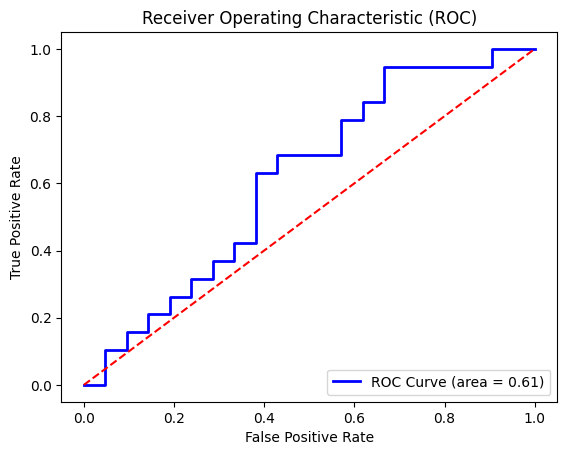

In [26]:
# Visualizing Confusion Matrix
conf_mat = confusion_matrix(y_test_class, y_pred_class) # Calculating the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plotting ROC Curve
y_prob = logistic_model.predict_proba(X_test_class)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_class, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


Step 7 - Actionable Insights

In [29]:
# Actionable Insights
# **Optimize delivery routes** by suggesting alternate paths during peak traffic hours.
# **Staff planning**: Increase the number of delivery personnel during Rush Hours to minimize delay.
# **Training**: Provide targeted training for delivery persons with lower historical efficiency.
# **Weather preparation**: Increase delivery time buffer during bad weather conditions.
